In [1]:
# %load  /home/mt/code/templates/firstcell.py
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget
# %matplotlib agg

In [2]:
# %load  /home/mt/code/templates/secondcell.py
import numpy as np
import os,pickle,sys,fnmatch,shutil
from os.path import join

import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rcParams.update({'figure.max_open_warning': 0})

# sys.path += [here+'../code']

In [3]:
# %load  /home/mt/code/templates/mXANES.py

In [4]:

# subprocess.call(' xsltproc $EXCITINGVISUAL/xmldos2grace.xsl dos.xml > dos.agr ', shell=True)
file='anatase_data/dos.agr'
with open(file) as f:
    lines = f.readlines()
len(lines)

183590

In [5]:
data=[]
states=[]
for i, line in enumerate(lines):
    
    if line.startswith('@s'):
        t = line.split('"')[1]
        t = t.split('\\')[0]
        states.append(t)
    elif line.startswith('&'):
        1
    elif line.startswith('#'):
        1    
    elif line.startswith('@'):
        1 
    else:
        if len(line) > 1:
            data.append(line.split())
data = np.array(data, np.float )

In [6]:
natoms = (len(states)-2) // 25
ndos   = (len(data)) // (25*natoms+2)
natoms

6

In [7]:
E = data[0:ndos, 0]
tdos   = data[0:ndos, 1]
intdos = data[ndos:2*ndos, 1]
p = data[2*ndos:, 1]

tmp = []
s=0
for i in range(natoms):
    tmp.append(p[s:s+ndos*25])
    s = s + ndos*25
                              
pdoss = []
for i in range(natoms):
    t = np.reshape(tmp[i], (25,ndos))
    t = t.T
    s = t[:,0]
    p = np.sum(t[:,1:4],  axis=1)
    d = np.sum(t[:,4:9],  axis=1)
    f = np.sum(t[:,9:16], axis=1)
    pdoss.append([s,p,d,f])

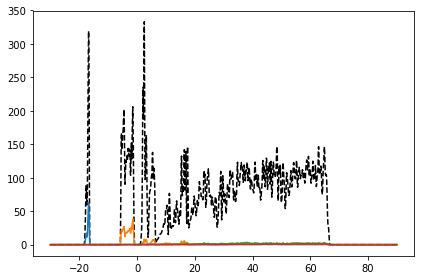

In [8]:
# Oxygen pdos
plt.figure()
plt.plot(E*2*13.605698066,tdos,'--k')
plt.plot(E*2*13.605698066,pdoss[0][0])
plt.plot(E*2*13.605698066,pdoss[0][1])
plt.plot(E*2*13.605698066,pdoss[0][2])
plt.plot(E*2*13.605698066,pdoss[0][3])
plt.tight_layout()

np.savetxt('anatase_data/anatase_oxygen.dat', 
           np.transpose((E*2*13.605698066,pdoss[0][0],pdoss[0][1],pdoss[0][2],pdoss[0][3])),
           delimiter='  ', fmt='%2.4e',header='E          s-dos       p-dos       d-dos       f-dos')

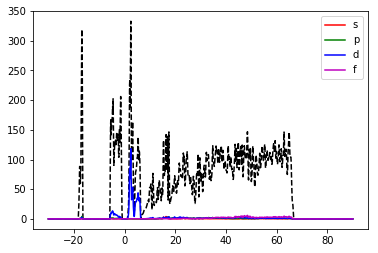

In [9]:
# Ti pdos
plt.figure()
plt.plot(E*2*13.605698066,tdos,'--k')
plt.plot(E*2*13.605698066,pdoss[4][0],'r-',label=('s'))
plt.plot(E*2*13.605698066,pdoss[4][1],'g-',label=('p'))
plt.plot(E*2*13.605698066,pdoss[4][2],'b-',label=('d'))
plt.plot(E*2*13.605698066,pdoss[4][3],'m-',label=('f'))
plt.legend()

np.savetxt('anatase_data/anatase_titanium.dat', 
           np.transpose((E*2*13.605698066,pdoss[4][0],pdoss[4][1],pdoss[4][2],pdoss[4][3])),
           delimiter='  ', fmt='%2.4e',header='E          s-dos       p-dos       d-dos       f-dos')

In [10]:
np.savetxt('anatase_data/anatase_total.dat', 
           np.transpose((E*2*13.605698066,tdos)),
           delimiter='  ', fmt='%2.4e',header='E          s-dos       p-dos       d-dos       f-dos')